<a href="https://colab.research.google.com/github/saraweiand/Programando-uma-RNA-em-Python/blob/main/Programando_uma_RNA_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criação da primeira RNA com python através da disciplina de Inteligência Artificial da minha faculdade de Engenharia de Software

In [4]:
#Bibliotecas que serão usadas
import pandas as pd
import numpy as np

#Entrando com os dados de item a item (podem ser importados do banco de dados, mas por enquanto será apenas essa entrada simples)
#Itens não numéricos foram convertidos (transporte)
# 1 para carro
# 2 para viagem
PrestacoesConta = [[1, 'local', 12, 10, 2300, 1],
                   [2, 'local', 1, 4, 83, 1],
                   [3, 'longa', 2, 22, 300.10, 2],
                   [4, 'local', 5, 1, 412, 1]]

tabelaContas = pd.DataFrame(data=PrestacoesConta,columns=["amostra", "tipo", "duracao", "frequencia", "valor", "transporte"])
tabelaContas

,amostra,tipo,duracao,frequencia,valor,transporte
0,1,local,12,10,2300.0,1
1,2,local,1,4,83.0,1
2,3,longa,2,22,300.1,2
3,4,local,5,1,412.0,1


In [6]:
#Transofrmando a categoria "Tipo" em numérica
tabelaContas ['tipo'] = tabelaContas ['tipo'].astype('category')
cat_col= tabelaContas.select_dtypes(['category']).columns

#Método que transforma - apply.(lambda)
tabelaContas[cat_col] = tabelaContas[cat_col].apply(lambda x:x.cat.codes)

tabelaContas

,amostra,tipo,duracao,frequencia,valor,transporte
0,1,0,12,10,2300.0,1
1,2,0,1,4,83.0,1
2,3,1,2,22,300.1,2
3,4,0,5,1,412.0,1


In [7]:
#Retirando a coluna de amostra com o método - .loc
tabelaContas = tabelaContas.loc[:, 'tipo': ]

tabelaContas

,tipo,duracao,frequencia,valor,transporte
0,0,12,10,2300.0,1
1,0,1,4,83.0,1
2,1,2,22,300.1,2
3,0,5,1,412.0,1


In [10]:
#Normalizando as escalas de entrada. As excursões ficam próximas
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
escala.fit(tabelaContas)
x_norm = escala.transform(tabelaContas)
x_norm

array([[-0.57735027,  1.62746694,  0.09325048,  1.71665332, -0.57735027],
       [-0.57735027, -0.92998111, -0.65275337, -0.77696355, -0.57735027],
       [ 1.73205081, -0.69748583,  1.58525817, -0.53277581,  1.73205081],
       [-0.57735027,  0.        , -1.02575529, -0.40691396, -0.57735027]])

**Para treinar o algoritmo de fraudes pelo método supervisionado, precisamos saber quais destas amostras correspondem a uma fraude (0) e quais são lícitas (1)**

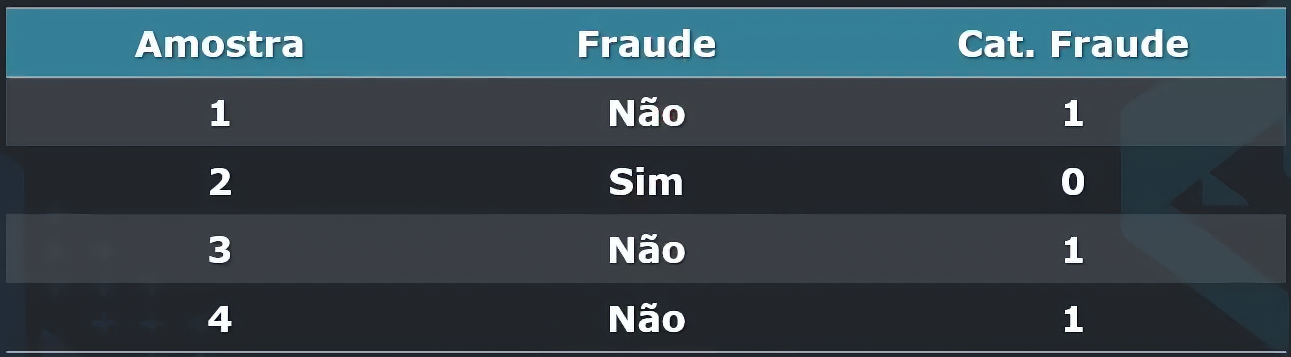

In [12]:
#Criando um vetor para conter o resultado das prestações
ResulPrestacoes = [[1, 0, 1, 1]]
Resultado = pd.DataFrame(data=ResulPrestacoes)
Resultado = Resultado.T

#Como é apenas 0 e 1 não precisamos normalizar

In [15]:
#Montando o perceptron
from sklearn.neural_network import MLPRegressor

rna = MLPRegressor(hidden_layer_sizes=(5, 3), #quantas neurônios em camadas ocultas teremos e quantos neurônios cada camada terá. Para aumentar os neurônios o modelo não é o MLP
                   max_iter=2000, #quantas iterações eu quero
                   tol=0.00001, #tolerância do erro
                   learning_rate_init=0.1, #
                   solver='sgd', #
                   activation='logistic', #
                   learning_rate='constant', #
                   verbose=0,)
rna.fit(x_norm, Resultado)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 3),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-05,
             verbose=0)